In [87]:
import numpy as np
import matplotlib.pyplot as plt

In [104]:
# 太阳时
ST = 10 # 当地时间
w = np.pi * (ST - 12) / 12

print(w)

-0.5235987755982988


In [89]:
# 太阳赤纬角1
import math as m

D = 90 # 距春分日天数
sin_th = np.sin(2*np.pi*D/365)*np.sin(2*np.pi*23.45/360) # 太阳赤纬角th的sin值
hudu_th = m.asin(sin_th) # 太阳赤纬角th的弧度值
jiaodu_th = hudu_th*180/np.pi # 太阳赤纬角th的角度值

print(hudu_th)

0.40917929369890327


In [90]:
# 赤纬角2
N = 180 # 一年的天数

th = 23.45 * np.sin(2*np.pi * (284 + N) / 365)
print(th)

23.241624800646512


In [91]:
# 太阳高度角as
sin_as = np.cos(hudu_th)*np.cos(39.4*np.pi/180)*np.cos(w)+sin_th*np.sin(39.4*np.pi/180) # 太阳高度角的sin值
hudu_as = m.asin(sin_as) # 太阳高度角的弧度值
jiaodu_as = hudu_as*180/np.pi # 太阳高度角的角度值

print(jiaodu_as)

60.05373746158655


In [92]:
# 太阳方位角ys
cos_ys = (sin_th-sin_as*np.sin(39.4*np.pi/180))/(np.cos(hudu_as)*np.cos(39.4*np.pi/180)) # 太阳方位角的cos值
hudu_ys = m.acos(cos_ys); # 太阳方位角的弧度值

jiaodu_ys = 0
if ST<=12 and ST>=0:
    jiaodu_ys = hudu_ys*180/np.pi
elif ST>12 and ST<=24:
    jiaodu_ys = 360-hudu_ys*180/np.pi

print(jiaodu_ys)

113.22826881955504


In [93]:
# 太阳辐射热量
G0 = 1.366; # 太阳常数

H = 3; # 海拔高度
a = 0.4237 - 0.00821*((6-H)**2) # 大气压强
b = 0.5055 + 0.00595*((6.5-H)**2) # 大气压强
c = 0.2711 + 0.01858*((2.5-H)**2) # 大气压强

DNI = G0*(a+b*np.exp(-c/sin_as))
print(DNI)

1.0525703078646167


In [94]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

h = 1.2923 # D = 90
th = 3.1416

R_x = -np.cos(h) * np.sin(th)
R_y = -np.cos(h) * np.cos(th)
R_z = -np.sin(h)

print("R_x: ", R_x)
print("R_y: ", R_y)
print("R_z: ", R_z)

R_x:  2.0196032708973784e-06
R_y:  0.2749102233654867
R_z:  -0.9614699002491235


In [95]:
# 入射光线的方向向量
I = np.array([2.0196, 0.2749, -0.9614])

# 出射光线的方向向量
R = np.array([1, 1, 1])

# 归一化入射光线和出射光线的方向向量
I_unit = I / np.linalg.norm(I)
R_unit = R / np.linalg.norm(R)

# 计算法向量
N = (I_unit + R_unit) / 2

# 归一化法向量
N_unit = N / np.linalg.norm(N)

print("法向量：", N_unit)

法向量： [0.89958386 0.42694246 0.09202725]


定义计算法向量和函数

In [96]:
def get_normal_vector(x,y,z):
    # 入射光线的方向向量
    I = np.array([2.0196, 0.2749, -0.9614])
    
    # 出射光线的方向向量
    R = np.array([x, y, z])
    
    # 归一化入射光线和出射光线的方向向量
    I_unit = I / np.linalg.norm(I)
    R_unit = R / np.linalg.norm(R)
    
    # 计算法向量
    N = (I_unit + R_unit) / 2
    
    # 归一化法向量
    N_unit = N / np.linalg.norm(N)
    
    return N_unit

In [97]:
import pandas as pd

file = pd.ExcelFile("C:\\Users\\33398\\Desktop\\cumcm2023problems\\A题\\附件.xlsx")

df = file.parse('Sheet1')

# 存储法向量
FaDB = []

# 遍历excel表格
for i in range(0, 1745):
    x = df.iloc[i, 0]
    y = df.iloc[i, 1]
    z = 80
    
    result = get_normal_vector(x, y, z)
    FaDB.append(result)
    print(result)    
    

[0.98766554 0.1217039  0.09851364]
[0.98017819 0.1718474  0.09858592]
[0.97012144 0.22152762 0.09894392]
[0.95752923 0.27058955 0.09959449]
[0.94244726 0.31887894 0.10054541]
[0.92492591 0.36625966 0.10181314]
[0.90503365 0.41257666 0.10341465]
[0.88284375 0.45769246 0.10537801]
[0.85844483 0.50146404 0.10773251]
[0.83193409 0.54375623 0.11052068]
[0.80342092 0.58443662 0.11379219]
[0.77303468 0.62336626 0.11760902]
[0.7409093  0.66042129 0.12205381]
[0.70721075 0.69546217 0.12722154]
[0.67210969 0.72836497 0.13324048]
[0.63582035 0.75898417 0.14026942]
[0.59857063 0.78718247 0.14851584]
[0.56065274 0.81278807 0.15825315]
[0.52239718 0.83561638 0.16984245]
[0.48423354 0.85542071 0.18377513]
[0.44670597 0.87187056 0.20073737]
[0.41054134 0.88448006 0.22169988]
[0.3767697  0.89246662 0.24808854]
[0.3468914  0.89449356 0.28204189]
[0.32324983 0.88806949 0.32686713]
[0.30962953 0.86819426 0.3877735 ]
[0.31237947 0.82399262 0.47271052]
[0.34154579 0.7305305  0.59133041]
[0.40715983 0.534474

求余弦效率

0 0.47496330486722316
1 0.4872235679942868
2 0.49890563404363275
3 0.509914614570354
4 0.520168354775194
5 0.5295945411882361
6 0.5381284937048983
7 0.54571324352519
8 0.5523021389242965
9 0.5578534623550915
10 0.5623347347078688
11 0.565719103697846
12 0.5679855053564528
13 0.5691222806817373
14 0.56912220351741
15 0.5679852743265684
16 0.5657187201141235
17 0.562334200818906
18 0.5578527812867826
19 0.5523013147570789
20 0.5457122812892403
21 0.5381273994149899
22 0.529593321906393
23 0.5201670186384716
24 0.5099131708943473
25 0.4989040933487966
26 0.4872219421332213
27 0.47496160712192004
28 0.4622234574024479
29 0.449125692001134
30 0.4357938519507664
31 0.4223705402549842
32 0.409011431254776
33 0.39589033176225463
34 0.38318823258280826
35 0.3711094301311179
36 0.35986126846724603
37 0.34966523383205794
38 0.34073788053774423
39 0.33329031250125546
40 0.32751491796797727
41 0.3235669123076144
42 0.32156386467277437
43 0.3215640012426146
44 0.32356731785438614
45 0.32751558053427

C:\Software\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25928 (\N{CJK UNIFIED IDEOGRAPH-6548}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Software\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Software\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24207 (\N{CJK UNIFIED IDEOGRAPH-5E8F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Software\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21495 (\N{CJK UNIFIED IDEOGRAPH-53F7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


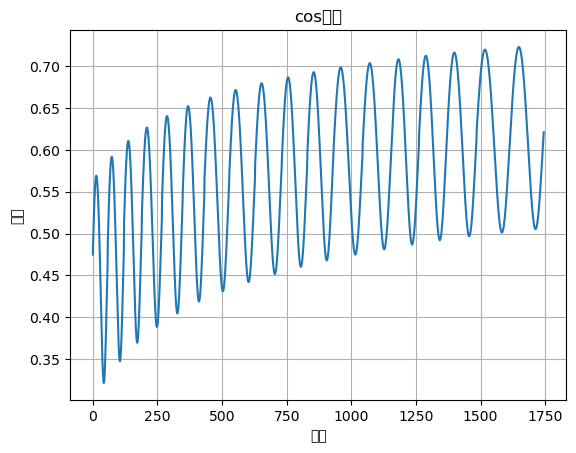

In [103]:
file = pd.ExcelFile("C:\\Users\\33398\\Desktop\\cumcm2023problems\\A题\\附件.xlsx")

df = file.parse('Sheet1')

# 求效率总值
sum = 0
DB = []

for i in range(0, 1745):
    x = df.iloc[i, 0]
    y = df.iloc[i, 1]
    test = np.array([x,y,80])
    
    S = np.array([R_x, R_y, R_z])
    
    # 归一化入射光线和出射光线的方向向量
    test_unit = test / np.linalg.norm(test)
    S_unit = S / np.linalg.norm(S)
    
    temp = np.arccos(np.dot(test_unit, S_unit))
    temp /= 2
    temp = np.cos(temp)
    print(str(i) + " " + str(temp))
    DB.append(temp)
    sum += temp
    
sum /= len(df)
print("效率总值：", sum)

x = np.arange(0, 1745, 1)
plt.plot(x, DB)

plt.title("cos效率")
plt.xlabel("序号")
plt.ylabel("效率")

plt.grid(True)
plt.show()

In [99]:
# 大气透射率
file = pd.ExcelFile("C:\\Users\\33398\\Desktop\\cumcm2023problems\\A题\\附件.xlsx")
df = file.parse('Sheet1')

# 求和算平均
sum = 0

for i in range(0, 1745):
    x = df.iloc[i, 0]
    y = df.iloc[i, 1]
    z = 80
    
    d_HR = np.sqrt(x**2 + y**2 + z**2)
    n_at = 0.99321 - 0.000117 * d_HR + 1.97*10**(-8)* d_HR**2
    sum += n_at
    print(n_at)
    
sum /= len(df)
print("大气透射率：", sum)

0.977851336608633
0.9778513612757666
0.9778513450765061
0.9778513566010055
0.9778513302188481
0.9778513478353652
0.9778513246445791
0.9778513615352675
0.9778513523213197
0.9778513690803458
0.9778513691439734
0.977851334051887
0.9778513614217359
0.9778513507227278
0.9778513507227278
0.9778513614217359
0.977851334051887
0.9778513691439734
0.9778513690803458
0.9778513523213197
0.9778513615352675
0.9778513246445791
0.9778513478353652
0.9778513302188481
0.9778513566010055
0.9778513450765061
0.9778513612757666
0.977851336608633
0.9778513721536053
0.977851336608633
0.9778513612757666
0.9778513450765061
0.9778513566010055
0.9778513302188481
0.9778513478353652
0.9778513246445791
0.9778513615352675
0.9778513523213197
0.9778513690803458
0.9778513691439734
0.977851334051887
0.9778513614217359
0.9778513507227278
0.9778513507227278
0.9778513614217359
0.977851334051887
0.9778513691439734
0.9778513690803458
0.9778513523213197
0.9778513615352675
0.9778513246445791
0.9778513478353652
0.9778513302188481


In [100]:
def Th(D):
    th = 23.45 * np.sin(2*np.pi * (284 + D) / 365)

    return th

Date = list(range(1, 366, 30))
for i in Date:
    print(Th(i))

-23.011636727869238
-17.78227120882229
-7.914911995481961
4.016824231055643
14.90088745587464
21.89848301589759
23.184489490948383
18.423489101595862
8.857251784032991
-3.019144761263041
-14.108084282624416
-21.517336031092775
-23.31440991666317


In [101]:
import numpy as np
import math as m
import pandas as pd

# 读取excel文件
file = pd.ExcelFile("C:\\Users\\33398\\Desktop\\cumcm2023problems\\A题\\附件.xlsx")
df = file.parse('Sheet1')

# 太阳时
def ST(Time):
    w = np.pi * (Time- 12) / 12

    return w

# 太阳赤纬角1
def Th(D):# 距春分日天数
    sin_th = np.sin(2*np.pi*D/365)*np.sin(2*np.pi*23.45/360) # 太阳赤纬角th的sin值
    hudu_th = m.asin(sin_th) # 太阳赤纬角th的弧度值
    jiaodu_th = hudu_th*180/np.pi # 太阳赤纬角th的角度值

    return hudu_th
# # 赤纬角2
# def Th(D):
#     th = 23.45 * np.sin(2*np.pi * (284 + D) / 365)
#
#     return th

# 太阳高度角as
def As(D,tm):
    temp_hudu_th = Th(D)
    temp_sin_th = np.sin(temp_hudu_th)

    sin_as = np.cos(temp_hudu_th)*np.cos(39.4*np.pi/180)*np.cos(ST(tm))+temp_sin_th*np.sin(39.4*np.pi/180) # 太阳高度角的sin值
    hudu_as = m.asin(sin_as) # 太阳高度角的弧度值
    jiaodu_as = hudu_as*180/np.pi # 太阳高度角的角度值

    return hudu_as

# 太阳方位角ys
def Ys(D,tm):
    temp_hudu_as = As(D,tm)
    temp_sin_as = np.sin(As(D,tm))
    temp_sin_th = np.sin(Th(D))

    cos_ys = (temp_sin_th-temp_sin_as*np.sin(39.4*np.pi/180))/(np.cos(temp_hudu_as)*np.cos(39.4*np.pi/180)) # 太阳方位角的cos值
    if cos_ys>1:
        cos_ys = 1
    elif cos_ys<-1:
        cos_ys = -1

    hudu_ys = m.acos(cos_ys); # 太阳方位角的弧度值

    jiaodu_ys = 0
    if tm<=12 and tm>=0:
        jiaodu_ys = hudu_ys*180/np.pi
    elif tm>12 and tm<=24:
        jiaodu_ys = 360-hudu_ys*180/np.pi

    return hudu_ys

# 太阳辐射热量
def SunRe(D,tm):
    temp_sin_as = np.sin(As(D,tm))

    G0 = 1.366;  # 太阳常数

    H = 3;  # 海拔高度
    a = 0.4237 - 0.00821 * ((6 - H) ** 2)  # 大气压强
    b = 0.5055 + 0.00595 * ((6.5 - H) ** 2)  # 大气压强
    c = 0.2711 + 0.01858 * ((2.5 - H) ** 2)  # 大气压强

    DNI = G0 * (a + b * np.exp(-c / temp_sin_as))
    return DNI

# 太阳入射角
def SunAngle(D,tm):
    h = As(D,tm)
    th = Ys(D,tm)

    R_x = -np.cos(h) * np.sin(th)
    R_y = -np.cos(h) * np.cos(th)
    R_z = -np.sin(h)

    vector = np.array([R_x, R_y, R_z])
    return vector

# 法线方向
def Faxian(D,tm,x,y,z):
    # 入射光线的方向向量
    I = SunAngle(D,tm)

    # 出射光线的方向向量
    R = np.array([x, y, z])

    # 归一化入射光线和出射光线的方向向量
    I_unit = I / np.linalg.norm(I)
    R_unit = R / np.linalg.norm(R)

    # 计算法向量
    N = (I_unit + R_unit) / 2

    # 归一化法向量
    N_unit = N / np.linalg.norm(N)

    return N_unit

# 大气透射率
dq_sum = 0
for f in range(0, 1745):
    x = df.iloc[f, 0]
    y = df.iloc[f, 1]
    z = 80

    d_HR = np.sqrt(x ** 2 + y ** 2 + z ** 2)
    n_at = 0.99321 - 0.000117 * d_HR + 1.97 * 10 ** (-8) * d_HR ** 2
    dq_sum += n_at

dq_sum /= len(df)  # 当天当时的大气透射率
# print("大气透射率：" + str(dq_sum))

# 余弦效率
def CosEff(x,y):
    # 出射光线的方向向量
    test = np.array([x, y, 80])

    S = SunAngle(i,j)

    # 归一化入射光线和出射光线的方向向量
    test_unit = test / np.linalg.norm(test)
    S_unit = S / np.linalg.norm(S)

    temp = np.arccos(np.dot(test_unit, S_unit))
    temp /= 2
    temp = np.cos(temp)

    return temp

# 输出热功率
def Power1(D,tm):
    Pow_DNI = SunRe(D,tm)

    # 假设阴影遮挡效率为90%
    e_zhe = 0.9
    # 假设集热器阶段效率为90%
    e_jire = 0.9

    sum = 0
    for i in df:
        S = 6*6*0.9
        e = e_zhe * CosEff(df.iloc[i, 0], df.iloc[i, 1]) * dq_sum * e_jire * 0.92
        sum += S * e

    print("热功率：" + str(sum * Pow_DNI))

|1-----------------

In [102]:
Date = list(range(1, 366, 30))
Time = list(range(9, 15, 1))

In [102]:
import numpy as np
import math as m
import pandas as pd

# 读取excel文件
file = pd.ExcelFile("C:\\Users\\33398\\Desktop\\cumcm2023problems\\A题\\附件.xlsx")
df = file.parse('Sheet1')

min = m.inf
for i in range(1,1744):
    x1 = df.iloc[i, 0]
    y1 = df.iloc[i, 1]
    
    for j in range(1,1745):
        if i==j:
            continue
        else:
            x2 = df.iloc[i, 0]
            y2 = df.iloc[i, 1]
            if((x2-x1)**2 + (y2-y1)**2 < min):
                min = (x2-x1)**2 + (y2-y1)**2

print(min ** 0.5)

0.0
